In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)


Descriptive Analysis

In [2]:
print("\nFirst 5 Rows:")
print(df.head())
print("\nShape of Dataset:")
print("Rows:", df.shape[0], " Columns:", df.shape[1])
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())


First 5 Rows:
   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engageme

In [4]:
print("\nNumber of Unique Campaign_IDs:", df["Campaign_ID"].nunique())
if "Location" in df.columns:
    print("\nUnique Locations:")
    print(df["Location"].unique())
else:
    print("\n Column 'Location' not found. Available columns:", df.columns.tolist())
if "Customer_Segment" in df.columns:
    print("\nUnique Customer Segments:")
    print(df["Customer_Segment"].unique())
else:
    print("\n Column 'Customer_Segment' not found. Available columns:", df.columns.tolist())
possible_channel_names = [c for c in df.columns if "Channel" in c or "channel" in c]
if possible_channel_names:
    for cname in possible_channel_names:
        print(f"\nCounts for {cname}:")
        print(df[cname].value_counts())
else:
    print("\n No column with 'Channel' found. Available columns:", df.columns.tolist())




Number of Unique Campaign_IDs: 22029

Unique Locations:
['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']

Unique Customer Segments:
['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']

Counts for Channel_Used:
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


 Exploratory Data Analysis (EDA) and Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

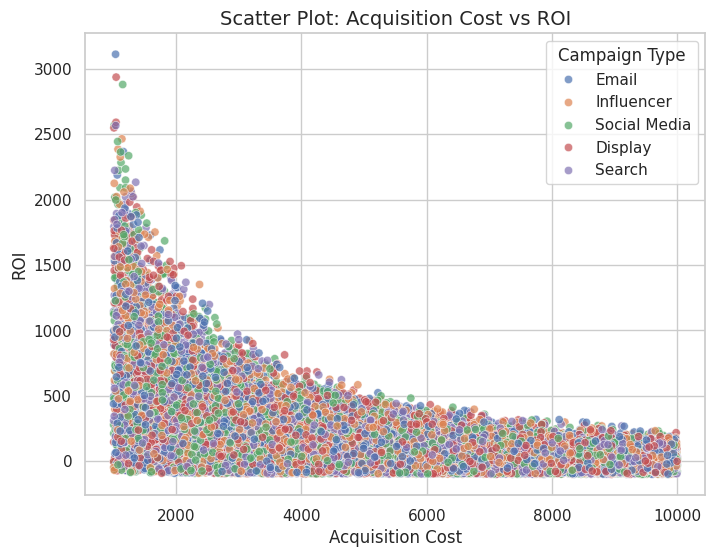

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Acquisition_Cost", y="ROI", data=df, hue="Campaign_Type", alpha=0.7)
plt.title("Scatter Plot: Acquisition Cost vs ROI", fontsize=14)
plt.xlabel("Acquisition Cost")
plt.ylabel("ROI")
plt.legend(title="Campaign Type")
plt.show()


/tmp/ipython-input-1052477460.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Channel_Used", y="Conversion_Rate", hue="Campaign_Type", data=df, ci=None)


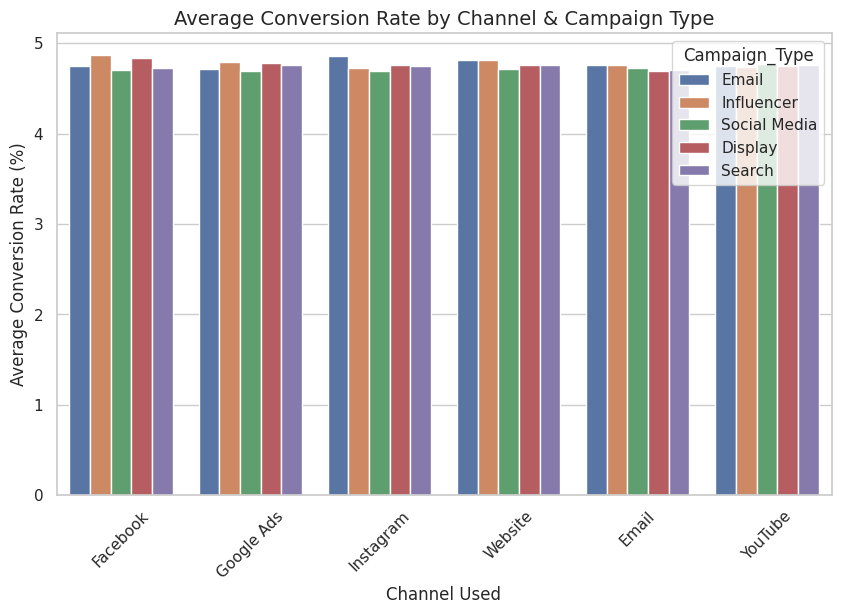

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x="Channel_Used", y="Conversion_Rate", hue="Campaign_Type", data=df, ci=None)
plt.title("Average Conversion Rate by Channel & Campaign Type", fontsize=14)
plt.xlabel("Channel Used")
plt.ylabel("Average Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3432310229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Campaign_Type", y="Engagement_Score", data=df, palette="Set2")


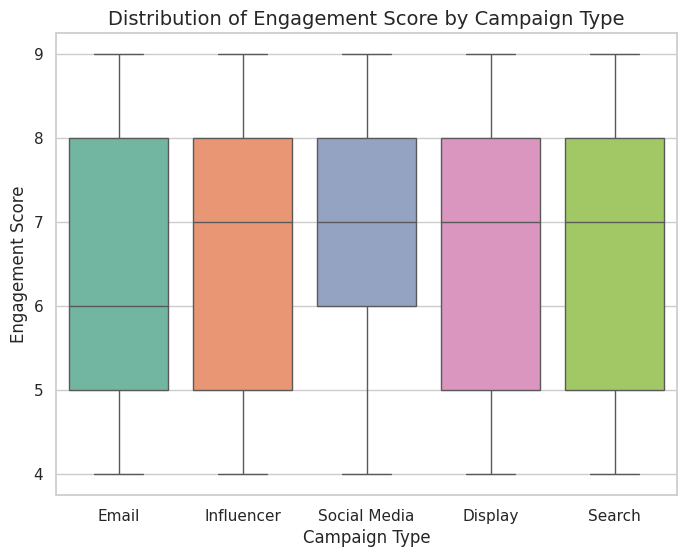

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Campaign_Type", y="Engagement_Score", data=df, palette="Set2")
plt.title("Distribution of Engagement Score by Campaign Type", fontsize=14)
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Score")
plt.show()

/tmp/ipython-input-3977965226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Company", y="ROI", estimator="mean", palette="muted")


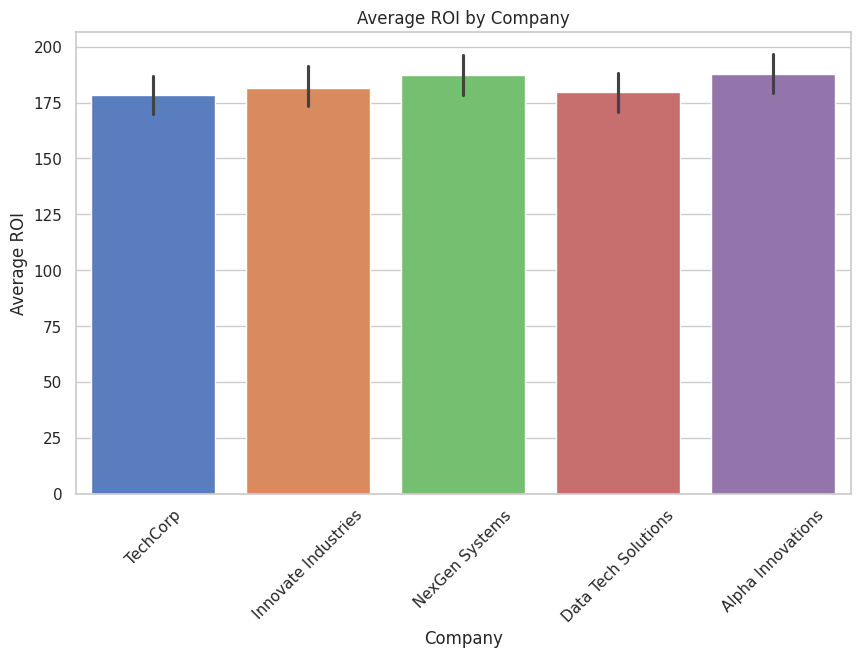

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Company", y="ROI", estimator="mean", palette="muted")
plt.title("Average ROI by Company")
plt.xticks(rotation=45)
plt.ylabel("Average ROI")
plt.show()

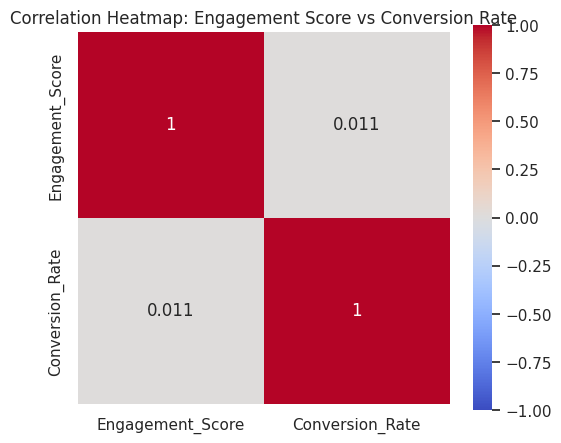

In [10]:
plt.figure(figsize=(6,5))
corr_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap: Engagement Score vs Conversion Rate")
plt.show()

Customer Segmentation

/tmp/ipython-input-879326753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Target_Audience", palette="Set3")


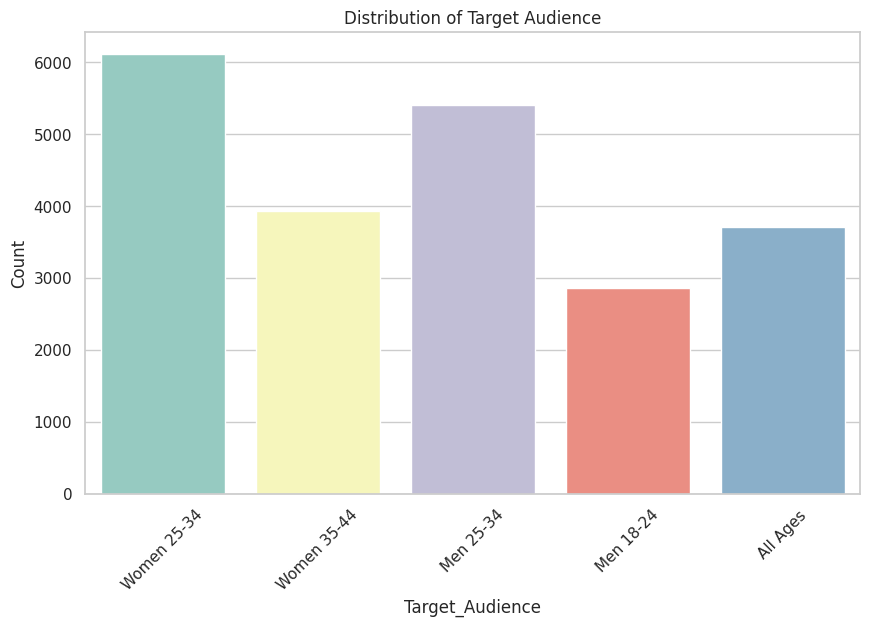

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Target_Audience", palette="Set3")
plt.title("Distribution of Target Audience")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


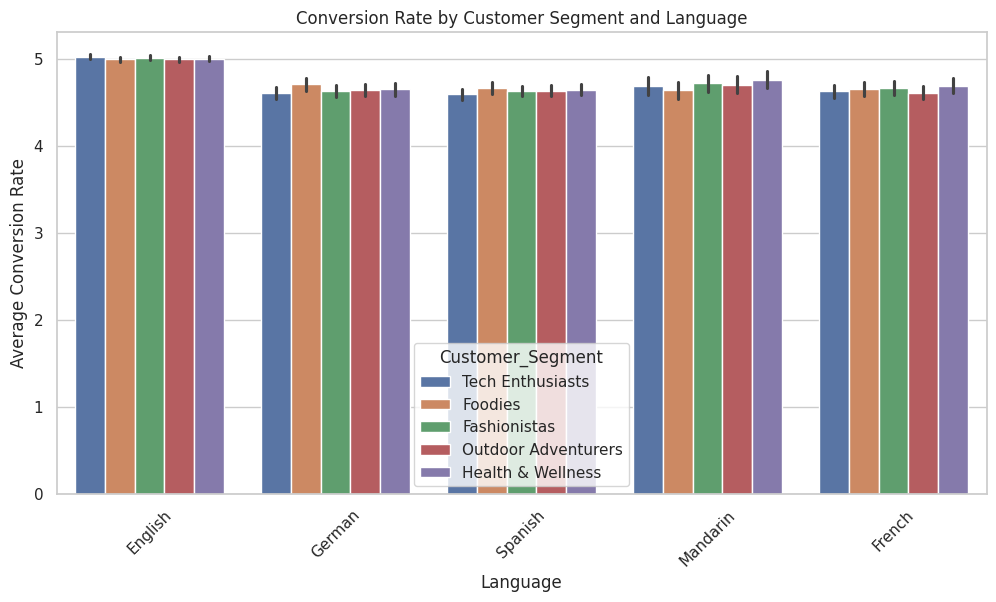

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Language", y="Conversion_Rate", hue="Customer_Segment", estimator="mean")
plt.title("Conversion Rate by Customer Segment and Language")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.show()

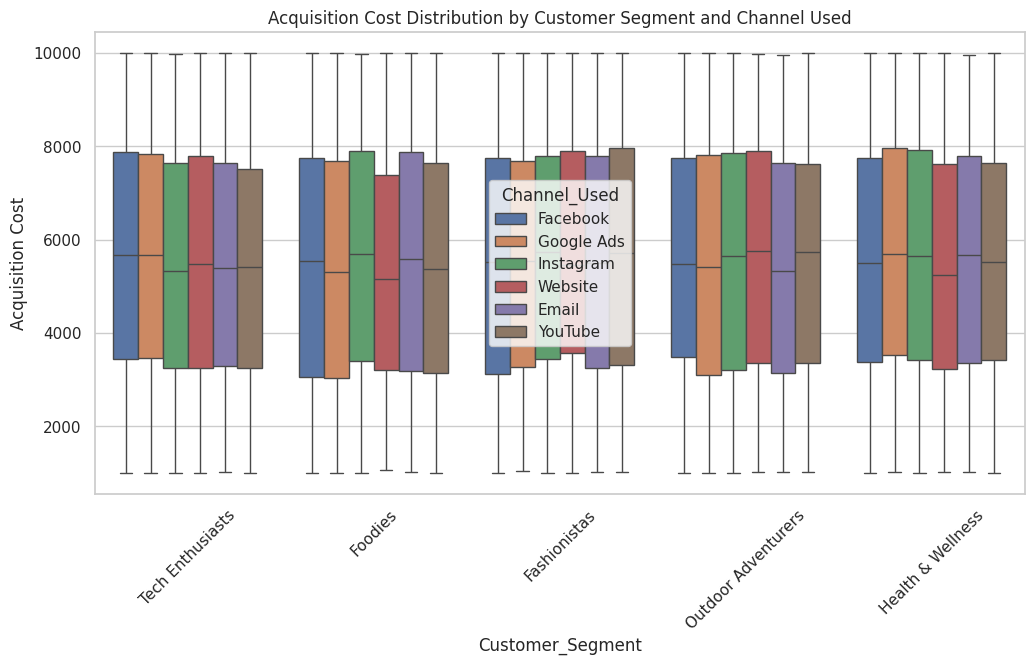

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Customer_Segment", y="Acquisition_Cost", hue="Channel_Used")
plt.title("Acquisition Cost Distribution by Customer Segment and Channel Used")
plt.xticks(rotation=45)
plt.ylabel("Acquisition Cost")
plt.show()

/tmp/ipython-input-478149970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Language", y="Conversion_Rate", estimator="mean", palette="muted")


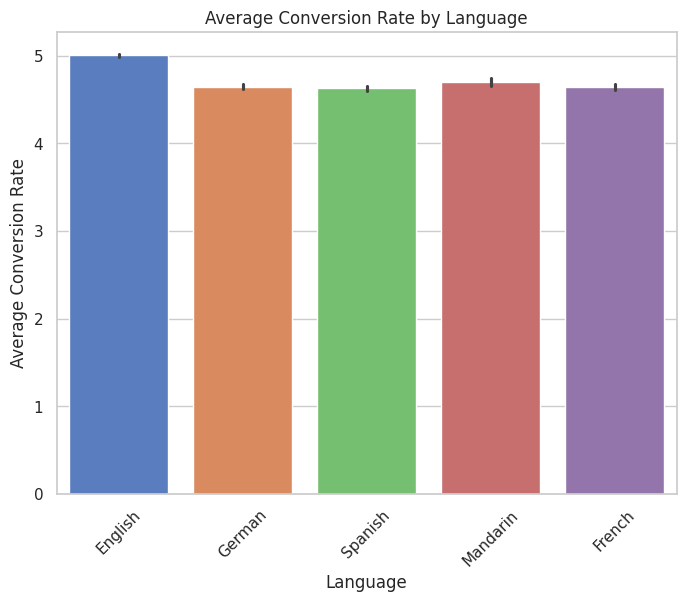

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Language", y="Conversion_Rate", estimator="mean", palette="muted")
plt.title("Average Conversion Rate by Language")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.show()

Channel Effectiveness

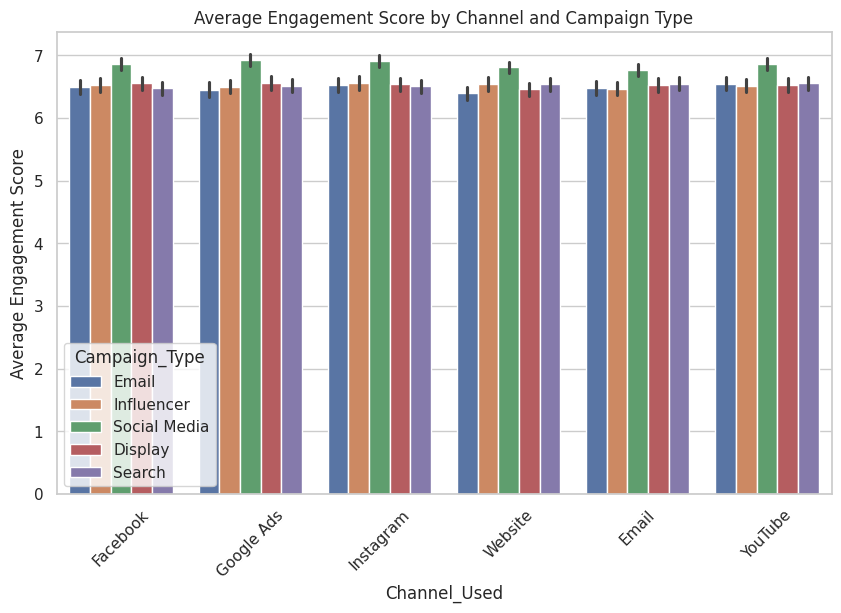

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Channel_Used", y="Engagement_Score", hue="Campaign_Type", estimator="mean")
plt.title("Average Engagement Score by Channel and Campaign Type")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=45)
plt.show()

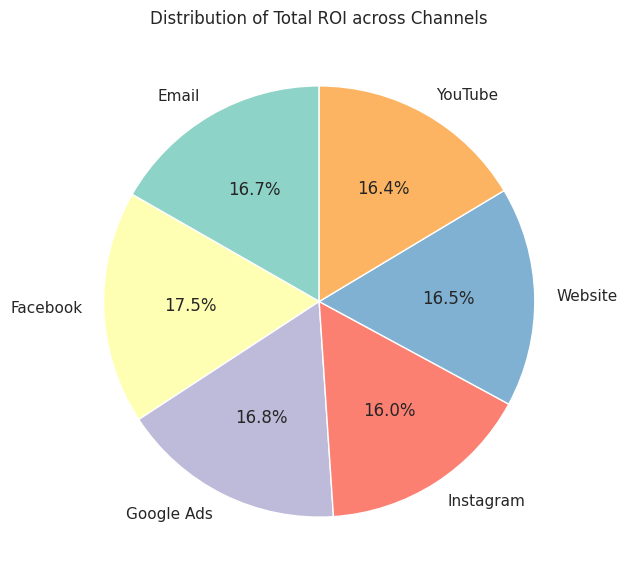

In [19]:
roi_by_channel = df.groupby("Channel_Used")["ROI"].sum()

plt.figure(figsize=(7,7))
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3"))
plt.title("Distribution of Total ROI across Channels")
plt.show()

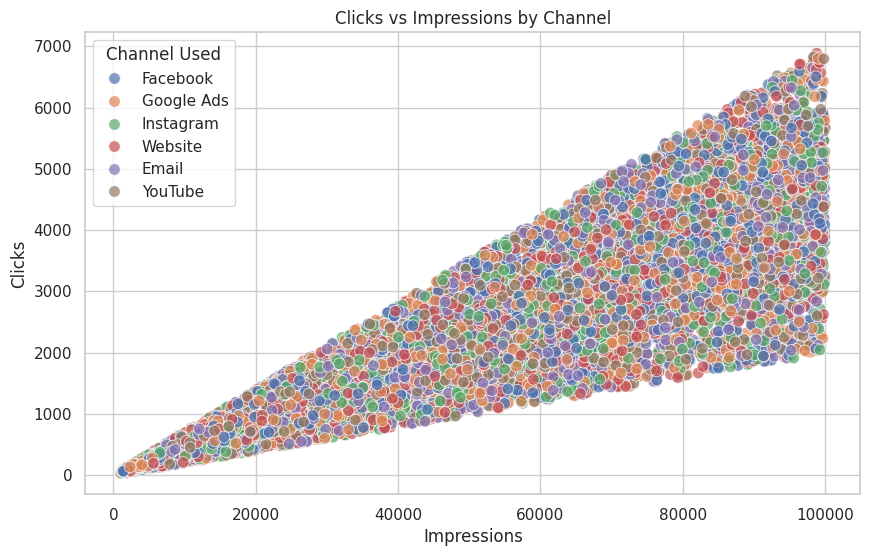

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Impressions", y="Clicks", hue="Channel_Used", alpha=0.7, s=70)
plt.title("Clicks vs Impressions by Channel")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.legend(title="Channel Used")
plt.show()

Time-Based Analysis

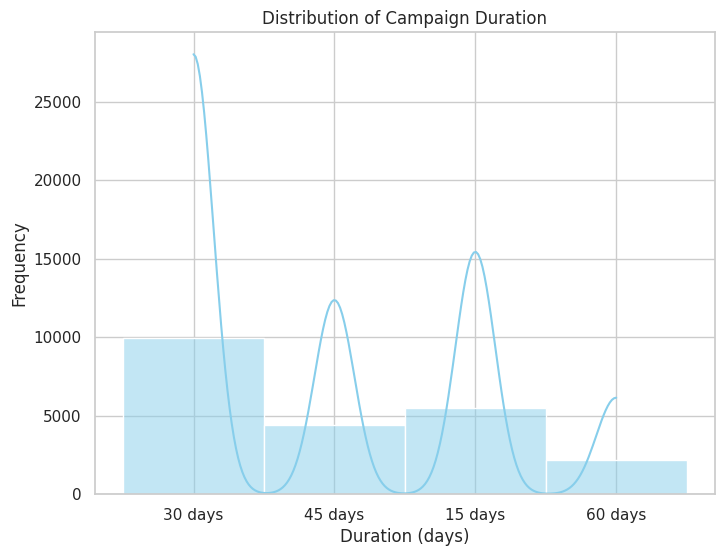

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
plt.figure(figsize=(8,6))
sns.histplot(df['Duration'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Campaign Duration")
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.show()

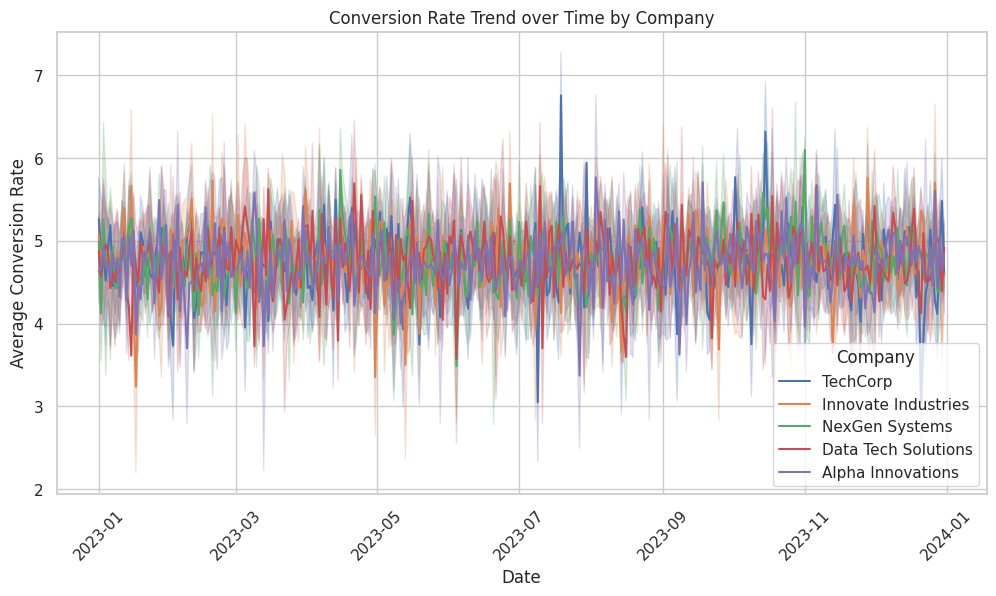

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Conversion_Rate", hue="Company", estimator="mean")
plt.title("Conversion Rate Trend over Time by Company")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.show()


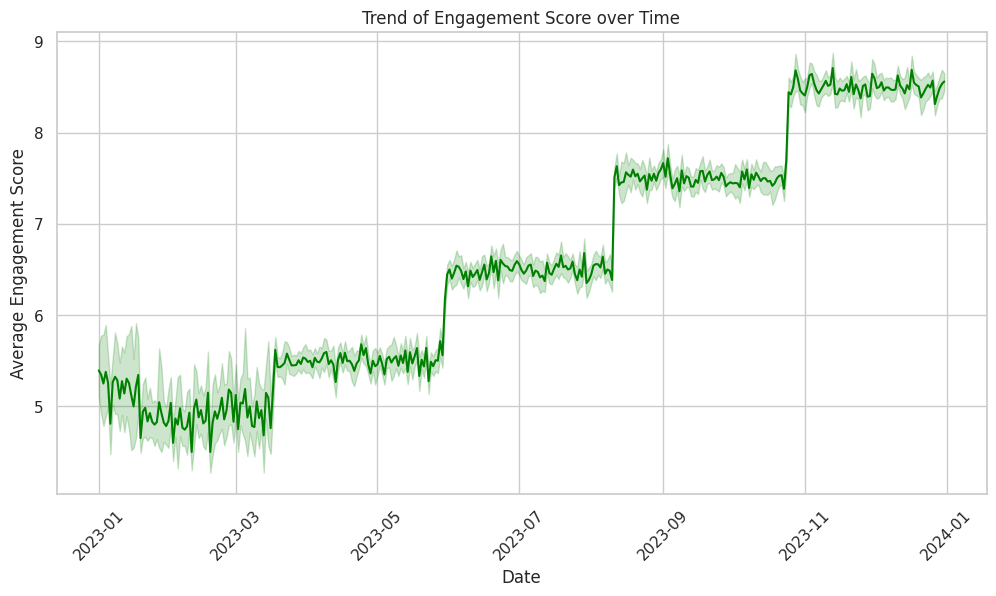

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Engagement_Score", estimator="mean", color="green")
plt.title("Trend of Engagement Score over Time")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=45)
plt.show()


Geographic Analysis

/tmp/ipython-input-4083123392.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Location", y="Acquisition_Cost", estimator="mean", palette="coolwarm")


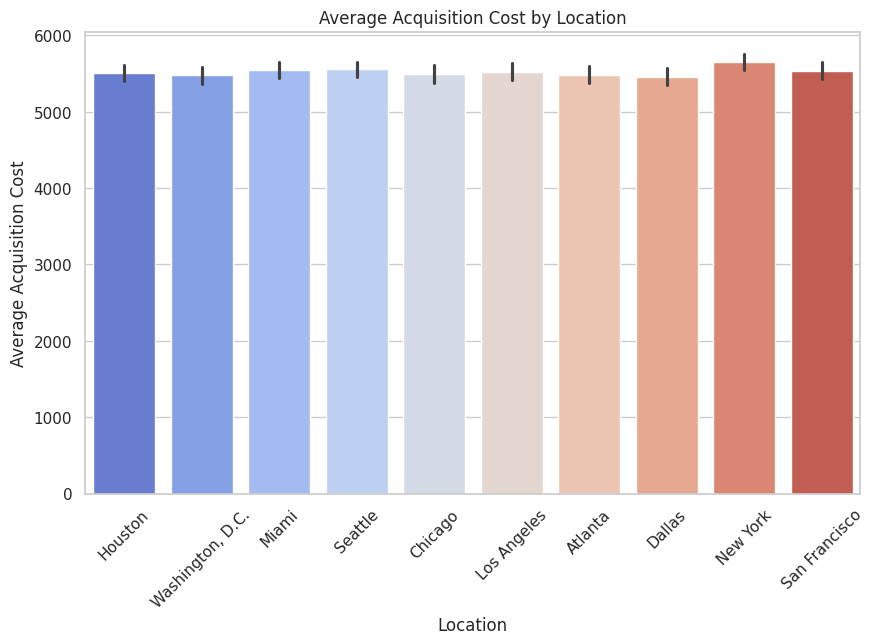

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Location", y="Acquisition_Cost", estimator="mean", palette="coolwarm")
plt.title("Average Acquisition Cost by Location")
plt.xticks(rotation=45)
plt.ylabel("Average Acquisition Cost")
plt.show()

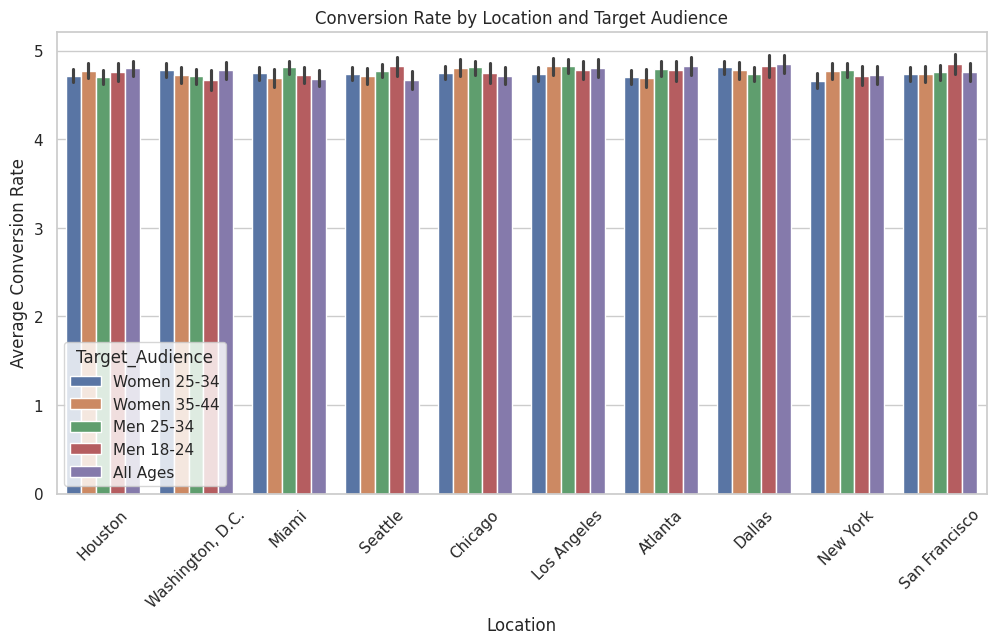

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Location", y="Conversion_Rate", hue="Target_Audience", estimator="mean")
plt.title("Conversion Rate by Location and Target Audience")
plt.xticks(rotation=45)
plt.ylabel("Average Conversion Rate")
plt.show()

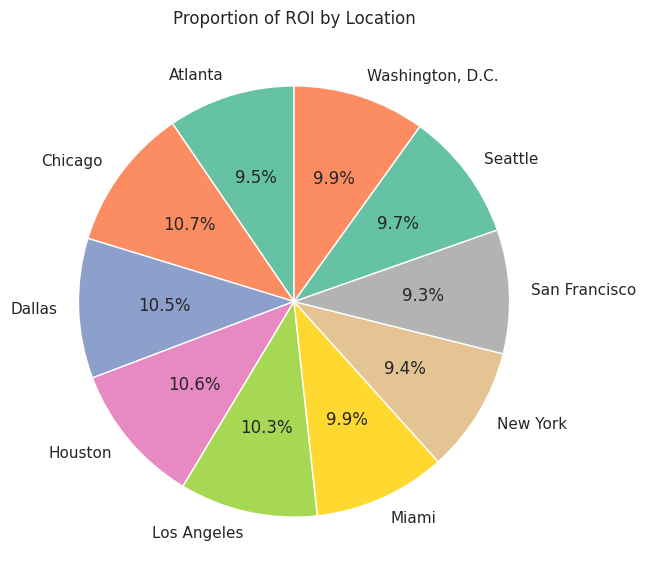

In [29]:
roi_by_location = df.groupby("Location")["ROI"].sum()

plt.figure(figsize=(7,7))
plt.pie(roi_by_location, labels=roi_by_location.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Proportion of ROI by Location")
plt.show()